# **LAB 2 - PART 1 PCA**

- Data Exploration
- PCA
- Simple Linear Regression


### Import tools

as listed in Lab direction sheet


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Data Exploration and Transformation

Read the Data_example.csv files from https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- parameter name `header`.
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

|     | 0   | 1     | 2    | 3    | 4    | 5   | 6    | 7    | 8    | 9    | 10   | 11   | 12   | 13   |
| --- | --- | ----- | ---- | ---- | ---- | --- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| 0   | 1   | 14.23 | 1.71 | 2.43 | 15.6 | 127 | 2.80 | 3.06 | 0.28 | 2.29 | 5.64 | 1.04 | 3.92 | 1065 |
| 1   | 1   | 13.20 | 1.78 | 2.14 | 11.2 | 100 | 2.65 | 2.76 | 0.26 | 1.28 | 4.38 | 1.05 | 3.40 | 1050 |
| 2   | 1   | 13.16 | 2.36 | 2.67 | 18.6 | 101 | 2.80 | 3.24 | 0.30 | 2.81 | 5.68 | 1.03 | 3.17 | 1185 |
| 3   | 1   | 14.37 | 1.95 | 2.50 | 16.8 | 113 | 3.85 | 3.49 | 0.24 | 2.18 | 7.80 | 0.86 | 3.45 | 1480 |
| 4   | 1   | 13.24 | 2.59 | 2.87 | 21.0 | 118 | 2.80 | 2.69 | 0.39 | 1.82 | 4.32 | 1.04 | 2.93 | 735  |

</details>


In [3]:
### START CODE HERE ###
urls = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(urls)
### END CODE HERE ###
df

1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  \
0    1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
1    1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
2    1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
3    1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
4    1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05   
..  ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
172  3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
173  3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
174  3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
175  3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
176  3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

     3.92  1065  
0    3.40  1050  
1    3.17  1185  
2    3.45  1480  
3    2.93   735  
4    2.85  1450  
..    ...   ...  
172  1.74   740  
173  1.56   750  
174  1.56   835  
175  1.62   840  
176  1.60   560  

[177 rows x 14 columns]

Set the column names according to the order specified in this list: `['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']`


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `df.column`
</details>

<br>
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

| Class label | Alcohol | Malic acid | Ash  | Alcalinity of ash | Magnesium | Total phenols | Flavanoids | Nonflavanoid phenols | Proanthocyanins | Color intensity | Hue  | OD280/OD315 of diluted wines | Proline |
| ----------- | ------- | ---------- | ---- | ----------------- | --------- | ------------- | ---------- | -------------------- | --------------- | --------------- | ---- | ---------------------------- | ------- |
| 1           | 14.23   | 1.71       | 2.43 | 15.6              | 127       | 2.80          | 3.06       | 0.28                 | 2.29            | 5.64            | 1.04 | 3.92                         | 1065    |
| 1           | 13.20   | 1.78       | 2.14 | 11.2              | 100       | 2.65          | 2.76       | 0.26                 | 1.28            | 4.38            | 1.05 | 3.40                         | 1050    |
| 1           | 13.16   | 2.36       | 2.67 | 18.6              | 101       | 2.80          | 3.24       | 0.30                 | 2.81            | 5.68            | 1.03 | 3.17                         | 1185    |
| 1           | 14.37   | 1.95       | 2.50 | 16.8              | 113       | 3.85          | 3.49       | 0.24                 | 2.18            | 7.80            | 0.86 | 3.45                         | 1480    |
| 1           | 13.24   | 2.59       | 2.87 | 21.0              | 118       | 2.80          | 2.69       | 0.39                 | 1.82            | 4.32            | 1.04 | 2.93                         | 735     |

</details>


In [4]:
### START CODE HERE ###
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
              'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']




### END CODE HERE ###
df

Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0              1    13.20        1.78  2.14               11.2        100   
1              1    13.16        2.36  2.67               18.6        101   
2              1    14.37        1.95  2.50               16.8        113   
3              1    13.24        2.59  2.87               21.0        118   
4              1    14.20        1.76  2.45               15.2        112   
..           ...      ...         ...   ...                ...        ...   
172            3    13.71        5.65  2.45               20.5         95   
173            3    13.40        3.91  2.48               23.0        102   
174            3    13.27        4.28  2.26               20.0        120   
175            3    13.17        2.59  2.37               20.0        120   
176            3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.65        2.76                  0.26             1.28   
1             2.80        3.24                  0.30             2.81   
2             3.85        3.49                  0.24             2.18   
3             2.80        2.69                  0.39             1.82   
4             3.27        3.39                  0.34             1.97   
..             ...         ...                   ...              ...   
172           1.68        0.61                  0.52             1.06   
173           1.80        0.75                  0.43             1.41   
174           1.59        0.69                  0.43             1.35   
175           1.65        0.68                  0.53             1.46   
176           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               4.38  1.05                          3.40     1050  
1               5.68  1.03                          3.17     1185  
2               7.80  0.86                          3.45     1480  
3               4.32  1.04                          2.93      735  
4               6.75  1.05                          2.85     1450  
..               ...   ...                           ...      ...  
172             7.70  0.64                          1.74      740  
173             7.30  0.70                          1.56      750  
174            10.20  0.59                          1.56      835  
175             9.30  0.60                          1.62      840  
176             9.20  0.61                          1.60      560  

[177 rows x 14 columns]

**Data Explore and Cleaning**

Fill NA? Drop something?<br>
Up to your own decision. **_Please try to understand the data before doing any operation._**


In [5]:
### START CODE HERE ###
df = df.fillna(round(df.median()))

### END CODE HERE ###
df

Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0              1    13.20        1.78  2.14               11.2        100   
1              1    13.16        2.36  2.67               18.6        101   
2              1    14.37        1.95  2.50               16.8        113   
3              1    13.24        2.59  2.87               21.0        118   
4              1    14.20        1.76  2.45               15.2        112   
..           ...      ...         ...   ...                ...        ...   
172            3    13.71        5.65  2.45               20.5         95   
173            3    13.40        3.91  2.48               23.0        102   
174            3    13.27        4.28  2.26               20.0        120   
175            3    13.17        2.59  2.37               20.0        120   
176            3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.65        2.76                  0.26             1.28   
1             2.80        3.24                  0.30             2.81   
2             3.85        3.49                  0.24             2.18   
3             2.80        2.69                  0.39             1.82   
4             3.27        3.39                  0.34             1.97   
..             ...         ...                   ...              ...   
172           1.68        0.61                  0.52             1.06   
173           1.80        0.75                  0.43             1.41   
174           1.59        0.69                  0.43             1.35   
175           1.65        0.68                  0.53             1.46   
176           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               4.38  1.05                          3.40     1050  
1               5.68  1.03                          3.17     1185  
2               7.80  0.86                          3.45     1480  
3               4.32  1.04                          2.93      735  
4               6.75  1.05                          2.85     1450  
..               ...   ...                           ...      ...  
172             7.70  0.64                          1.74      740  
173             7.30  0.70                          1.56      750  
174            10.20  0.59                          1.56      835  
175             9.30  0.60                          1.62      840  
176             9.20  0.61                          1.60      560  

[177 rows x 14 columns]

**Split the variables**

X includes all columns except `Class label`, Y includes only `Class label`.


In [6]:
### START CODE HERE ###

X = df.drop('Class label', axis=1)
Y = pd.DataFrame(df['Class label'])
### END CODE HERE ###


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
X's columns: ['Alcalinity of ash', 'Alcohol', 'Ash', 'Color intensity', 'Flavanoids', 'Hue', 'Magnesium', 'Malic acid', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines', 'Proanthocyanins', 'Proline', 'Total phenols']
Y's column: ['Class label']
```

</details>


In [7]:
print("X's columns:",X.columns.tolist())
print("Y's column:",Y.columns.tolist())


X's columns: ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
Y's column: ['Class label']


**Data Transformation**

Standardize X Dataframe.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Scikitlearn's `preprocessing` migth be useful here.</br>
https://scikit-learn.org/stable/modules/preprocessing.html
</details> 
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

|       | Alcalinity of ash | Alcohol   | Ash          | Color intensity | Flavanoids | Hue       | Magnesium | Malic acid   | Nonflavanoid phenols | OD280/OD315 of diluted wines | Proanthocyanins | Proline   | Total phenols |
| ----- | ----------------- | --------- | ------------ | --------------- | ---------- | --------- | --------- | ------------ | -------------------- | ---------------------------- | --------------- | --------- | ------------- |
| count | 178.0             | 178.0     | 178.0        | 178.0           | 178.0      | 178.0     | 178.0     | 178.0        | 178.0                | 178.0                        | 178.0           | 178.0     | 178.0         |
| mean  | 0.0               | 0.0       | 1.247442e-17 | 9.979533e-18    | 0.0        | 0.0       | 0.0       | 1.197544e-16 | 0.0                  | 0.0                          | 0.0             | 0.0       | 0.0           |
| std   | 1.002821          | 1.002821  | 1.002821     | 1.002821        | 1.002821   | 1.002821  | 1.002821  | 1.002821     | 1.002821             | 1.002821                     | 1.002821        | 1.002821  | 1.002821      |
| min   | -2.671018         | -2.434235 | -3.679162    | -1.634288       | -1.695971  | -2.094732 | -2.088255 | -1.432983    | -1.868234            | -2.069034                    | -1.493188       | -2.107246 | -2.671018     |
| 25%   | -0.689137         | -0.788245 | -0.5721225   | -0.7951025      | -0.827539  | -0.767562 | -0.824415 | -0.6587486   | -0.7401408           | -0.597284                    | -0.784638       | -0.885468 | -0.689137     |
| 50%   | 0.001518          | 0.061     | -0.02382132  | -0.1592246      | 0.10615    | 0.033127  | -0.122282 | -0.423112    | -0.1760947           | -0.0628977                   | -0.233720       | 0.09596   | 0.001518      |
| 75%   | 0.602088          | 0.836129  | 0.6981085    | 0.493956        | 0.849085   | 0.713164  | 0.509638  | 0.6697929    | 0.6095407            | 0.629175                     | 0.7582486       | 0.808997  | 0.602088      |
| max   | 3.154511          | 2.259772  | 3.156325     | 3.435432        | 3.062832   | 3.301694  | 4.371372  | 3.109192     | 2.402403             | 1.960915                     | 3.485073        | 2.971473  | 3.154511      |

</details>


In [8]:
### START CODE HERE ###
standardize_scaler = preprocessing.StandardScaler()
std_X = standardize_scaler.fit_transform(X)
X = pd.DataFrame(std_X, columns=X.columns.tolist())
### END CODE HERE ###
X.describe()

Alcohol    Malic acid           Ash  Alcalinity of ash  \
count  1.770000e+02  1.770000e+02  1.770000e+02       1.770000e+02   
mean  -5.218675e-16  2.810056e-16 -3.813647e-16      -2.408619e-16   
std    1.002837e+00  1.002837e+00  1.002837e+00       1.002837e+00   
min   -2.434746e+00 -1.433400e+00 -3.668064e+00      -2.680472e+00   
25%   -7.856866e-01 -6.628933e-01 -5.692924e-01      -6.964846e-01   
50%    6.984037e-02 -4.209899e-01 -2.245039e-02      -5.094986e-03   
75%    8.385748e-01  6.810145e-01  7.066723e-01       5.961134e-01   
max    2.276852e+00  3.100048e+00  3.149233e+00       3.151249e+00   

          Magnesium  Total phenols    Flavanoids  Nonflavanoid phenols  \
count  1.770000e+02   1.770000e+02  1.770000e+02          1.770000e+02   
mean  -8.028731e-17  -2.810056e-16  1.605746e-16         -6.021549e-16   
std    1.002837e+00   1.002837e+00  1.002837e+00          1.002837e+00   
min   -2.093373e+00  -2.100648e+00 -1.690491e+00         -1.868993e+00   
25%   -8.198411e-01  -8.840502e-01 -8.268924e-01         -7.426883e-01   
50%   -1.123234e-01   9.242960e-02  1.069996e-01         -1.795360e-01   
75%    5.244425e-01   8.127835e-01  8.400546e-01          6.249672e-01   
max    4.415790e+00   2.541633e+00  3.069345e+00          2.394874e+00   

       Proanthocyanins  Color intensity           Hue  \
count     1.770000e+02     1.770000e+02  1.770000e+02   
mean     -4.014366e-17     1.806465e-16  6.021549e-16   
std       1.002837e+00     1.002837e+00  1.002837e+00   
min      -2.065084e+00    -1.628565e+00 -2.087573e+00   
25%      -5.912136e-01    -7.959038e-01 -7.745875e-01   
50%      -6.483128e-02    -1.617011e-01  1.320404e-02   
75%       6.370119e-01     4.940731e-01  7.134631e-01   
max       3.497023e+00     3.427800e+00  3.295669e+00   

       OD280/OD315 of diluted wines       Proline  
count                  1.770000e+02  1.770000e+02  
mean                   7.225858e-16  1.605746e-16  
std                    1.002837e+00  1.002837e+00  
min                   -1.897707e+00 -1.487599e+00  
25%                   -9.590184e-01 -7.805774e-01  
50%                    2.498992e-01 -2.327949e-01  
75%                    8.045791e-01  7.640417e-01  
max                    1.985052e+00  2.977465e+00

**Visualize Variable (scatter plot pairs of variables)**

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `sns.pairplot()`
</details> 
<br>

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

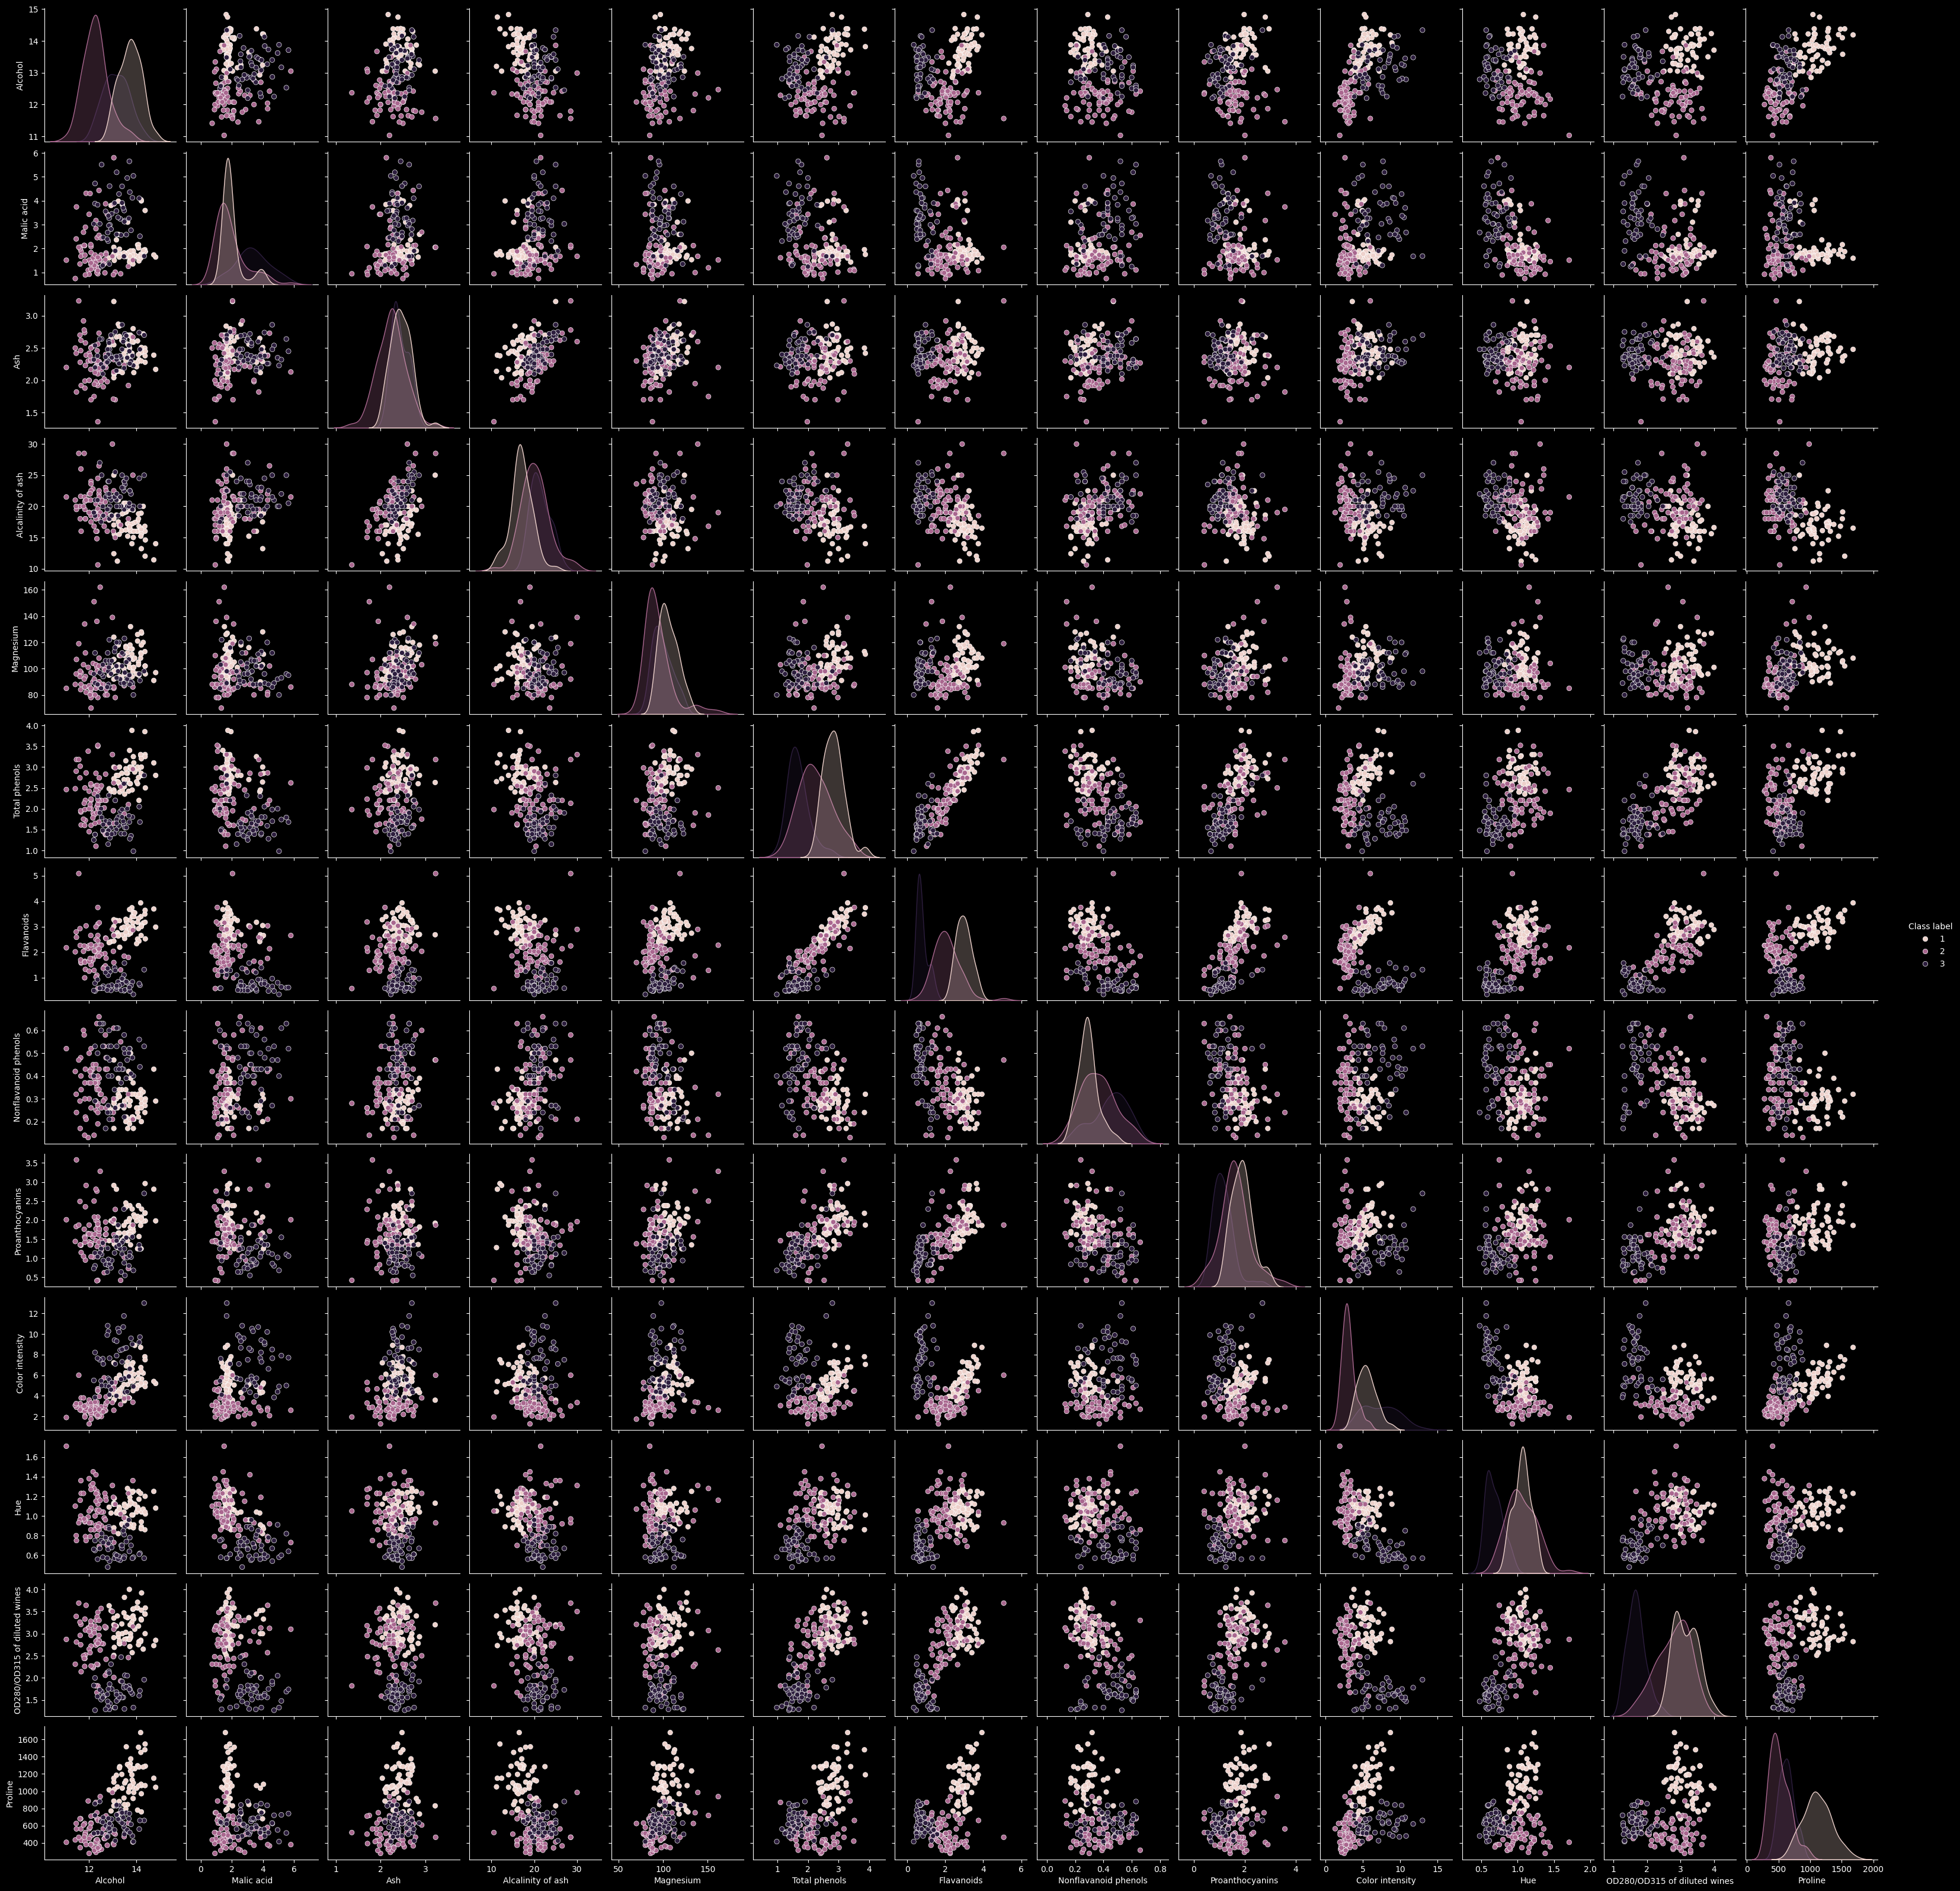

</details>


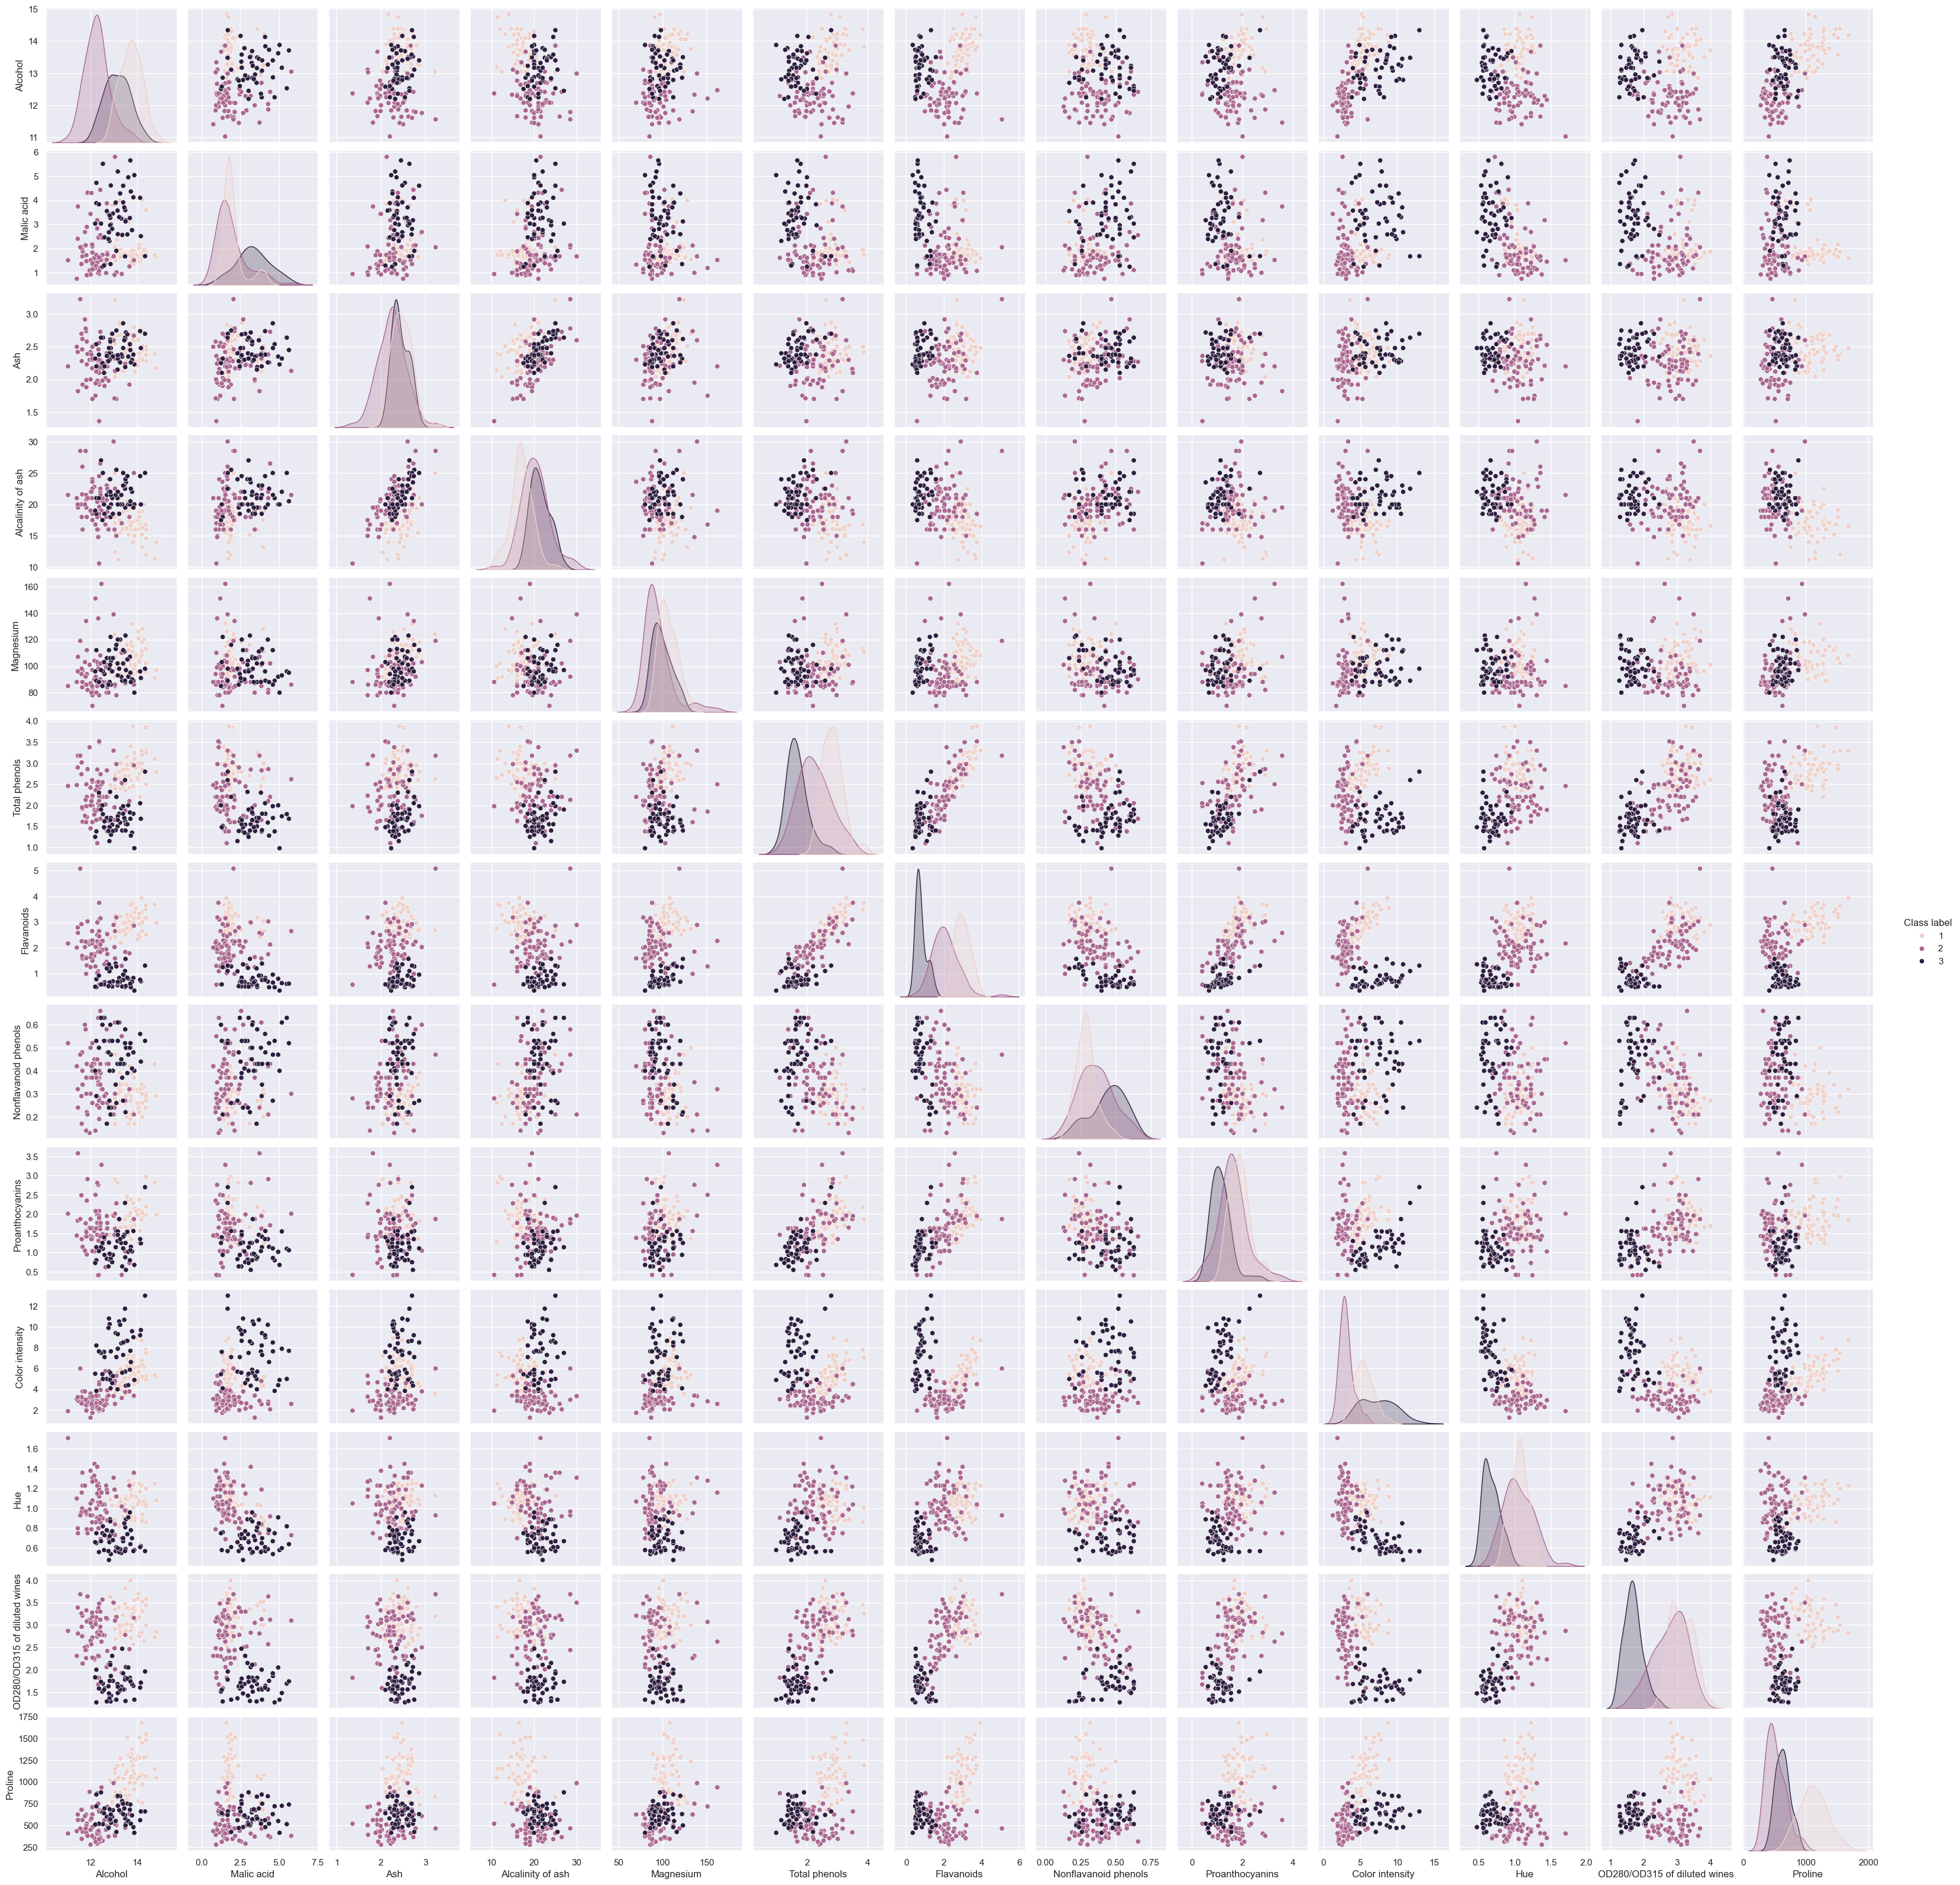

In [9]:
### START CODE HERE ###
sns.set(style='darkgrid', context='notebook')
sns.pairplot(df, hue='Class label')
plt.show()


### END CODE HERE ###

## Principal Component Analysis (PCA)


**Calculate PCA of all varaiables**

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `PCA()`
- This might be useful : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
Explained Variance ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
Explained Variance (eigenvalues) : [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
--------------------------------------------
PCA components (eigenvectors) :
[[-0.23932041  0.1443294  -0.00205106 -0.0886167   0.4229343   0.29671456
   0.14199204 -0.24518758 -0.2985331   0.37616741  0.31342949  0.28675223
   0.39466085]
 [ 0.0105905  -0.48365155 -0.31606881 -0.52999567  0.00335981  0.27923515
  -0.299634   -0.22493093 -0.02877949  0.16449619 -0.03930172 -0.36490283
  -0.06503951]]
```

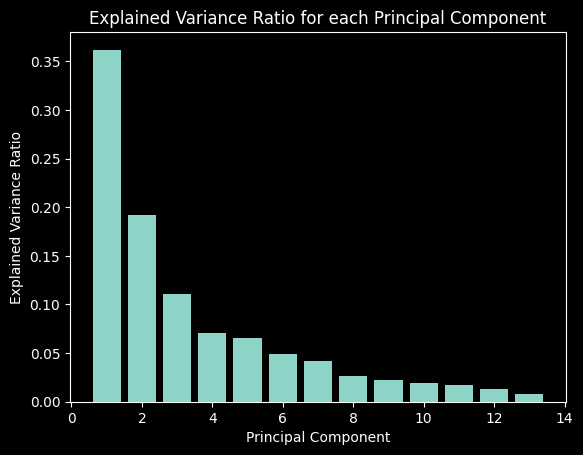

</details>


Explained Variance ratio: [0.35983071 0.1924128  0.1117946  0.07111109 0.06628744 0.04960367
 0.04246014 0.02697991 0.02224462 0.01898528 0.01734155 0.01295206
 0.00799613]
Explained Variance (eigenvalues) : [4.7043776  2.51557865 1.46158736 0.92969665 0.86663298 0.64851162
 0.55511807 0.35273166 0.29082309 0.248211   0.2267211  0.16933351
 0.10454035]
--------------------------------------------
PCA components (eigenvectors) :
[[ 0.13788809 -0.24638109 -0.0043183  -0.23737955  0.1350017   0.39586939
   0.42439422 -0.29913568  0.31280321 -0.09328558  0.29956536  0.37720252
   0.28428101]
 [-0.48583464 -0.22157478 -0.31528188  0.01214349 -0.30028828 -0.07054905
  -0.00173207 -0.02466918 -0.04144561 -0.52801878  0.27405069  0.16544914
  -0.3695384 ]
 [-0.20877489  0.09019328  0.62374304  0.61379873  0.13573164  0.14462048
   0.14931754  0.16913634  0.15060183 -0.13608317  0.08255118  0.16681112
  -0.12803431]
 [-0.0011407   0.53313643 -0.20534831  0.0572236  -0.39169387  0.20259928
   0.

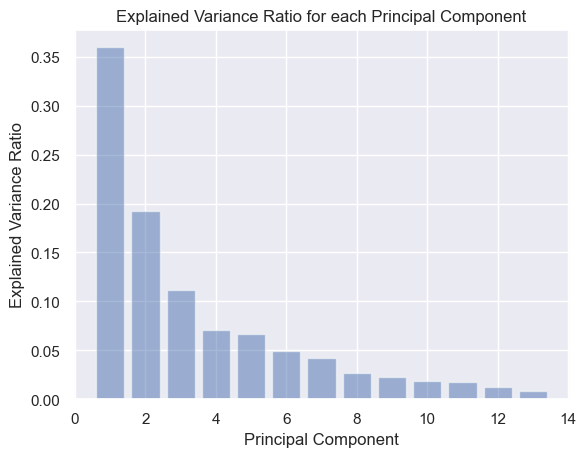

In [10]:
### START CODE HERE ###
pca = PCA()
X_pca = pca.fit_transform(X)
print('Explained Variance ratio:', pca.explained_variance_ratio_)
print('Explained Variance (eigenvalues) :', pca.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) :')
print(pca.components_)
plt.bar(range(1,14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()
### END CODE HERE ###

**Calculate PCA of 3 varaiables**

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `PCA()`
- This might be useful : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
Explained Variance ratio: [0.36198848 0.1920749 ]
Explained Variance (eigenvalues) : [4.73243698 2.51108093]
--------------------------------------------
PCA components (eigenvectors) :
[[-0.23932041  0.1443294  -0.00205106 -0.0886167   0.4229343   0.29671456
   0.14199204 -0.24518758 -0.2985331   0.37616741  0.31342949  0.28675223
   0.39466085]
 [ 0.0105905  -0.48365155 -0.31606881 -0.52999567  0.00335981  0.27923515
  -0.299634   -0.22493093 -0.02877949  0.16449619 -0.03930172 -0.36490283
  -0.06503951]]
```

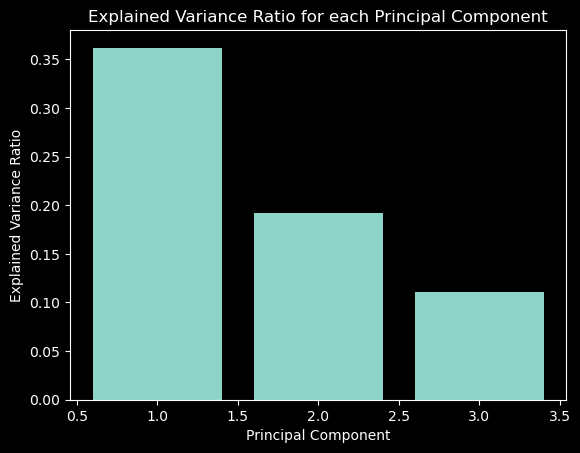

</details>


Explained Variance ratio: [0.35983071 0.1924128  0.1117946 ]
Explained Variance (eigenvalues) : [4.7043776  2.51557865 1.46158736]
--------------------------------------------
PCA components (eigenvectors) :
[[ 0.13788809 -0.24638109 -0.0043183  -0.23737955  0.1350017   0.39586939
   0.42439422 -0.29913568  0.31280321 -0.09328558  0.29956536  0.37720252
   0.28428101]
 [-0.48583464 -0.22157478 -0.31528188  0.01214349 -0.30028828 -0.07054905
  -0.00173207 -0.02466918 -0.04144561 -0.52801878  0.27405069  0.16544914
  -0.3695384 ]
 [-0.20877489  0.09019328  0.62374304  0.61379873  0.13573164  0.14462048
   0.14931754  0.16913634  0.15060183 -0.13608317  0.08255118  0.16681112
  -0.12803431]]


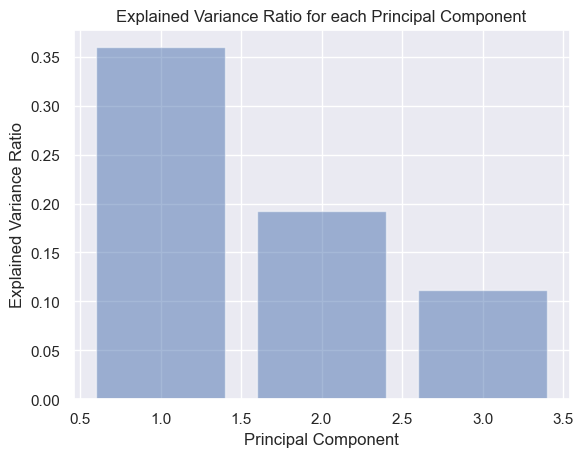

In [11]:
### START CODE HERE ###
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
print('Explained Variance ratio:', pca.explained_variance_ratio_)
print('Explained Variance (eigenvalues) :', pca.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) :')
print(pca.components_)
plt.bar(range(1,4), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()
### END CODE HERE ###

### **Train/Test Model**


**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 80% of data for training and last 20% for testing.


In [12]:
### START CODE HERE ###
#Split the dataset into training and testing sets. Reserve frist 80% of data for training and last 20% for testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### END CODE HERE ###

Split training data into training (70%) and validation sets (30%).


In [13]:
### START CODE HERE ###
#Split training data into training (70%) and validation sets (30%). 
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)
### END CODE HERE ###

**Initialize models**

- `LinearRegression()`


In [14]:
### START CODE HERE ###
#linear regression
model = LinearRegression()

### END CODE HERE ###

### Model Training


Train LinearRegerssion() using

1. X original data


In [15]:
### START CODE HERE ###
#Train LinearRegerssion()
model.fit(X_train, Y_train)

### END CODE HERE ###

LinearRegression()

2. X_PCA with n_components = n

- (Choose n at least 3 values from n_list = range(1,N)
- N = จำนวน input Feature (dimension of X)


In [16]:
### START CODE HERE ###
r2scorelist_test = []
r2scorelist_val = []
mselist_test = []
mselist_val = []
n_list = range(1,14)
for n in n_list:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_val)
    r2 = r2_score(Y_val, Y_pred)
    mse = mean_squared_error(Y_val, Y_pred)
    r2scorelist_val.append(r2)
    mselist_val.append(mse)
    Y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    r2scorelist_test.append(r2)
    mselist_test.append(mse)
    
print(mselist_val)


### END CODE HERE ###

[0.1320344526342971, 0.13232465510594713, 0.13198644244795982, 0.16004177846312356, 0.12553407694421884, 0.0738405013587667, 0.11526202285387006, 0.11292249337655356, 0.10127455383853601, 0.10447555212477319, 0.10365838424473808, 0.10707197999927637, 0.09489858998851636]


**Model Performance Evaluation (MSE, R-square)**

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- mean_squared_error(), r2_score()

- Scikitlearn's `metrics` migth be useful here.</br>
  https://scikit-learn.org/stable/modules/model_evaluation.html

</details> 
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.</br>
  </br>

|     | n   | val_MSE  | test_MSE | val_r2   | test_r2  |
| --- | --- | -------- | -------- | -------- | -------- |
| 0   | 0   | 0.051039 | 0.111825 | 0.914363 | 0.823047 |
| 1   | 1   | 0.106382 | 0.153570 | 0.821506 | 0.756988 |
| 2   | 2   | 0.106146 | 0.155484 | 0.821902 | 0.753960 |
| 3   | 3   | 0.113444 | 0.171154 | 0.809658 | 0.729162 |
| 4   | 4   | 0.113062 | 0.175151 | 0.810297 | 0.722838 |
| 5   | 5   | 0.096968 | 0.146228 | 0.837302 | 0.768607 |
| 6   | 7   | 0.072978 | 0.119330 | 0.877554 | 0.811170 |
| 7   | 10  | 0.057971 | 0.107307 | 0.902733 | 0.830195 |
| 8   | 13  | 0.051039 | 0.111825 | 0.914363 | 0.823047 |

</details>


1. Model Evaluation with Validation and Test Data


In [17]:
### START CODE HERE ###
#model evaluation
df_new = pd.DataFrame({'n':n_list,'mse_val':mselist_val , 'mse_test':mselist_test, 'r2score_test':r2scorelist_test, 'r2score_val':r2scorelist_val, 'r2score_test':r2scorelist_test})

### END CODE HERE ###
df_new

n   mse_val  mse_test  r2score_test  r2score_val
0    1  0.132034  0.118149      0.783421     0.740837
1    2  0.132325  0.117726      0.784196     0.740267
2    3  0.131986  0.119253      0.781397     0.740931
3    4  0.160042  0.114789      0.789580     0.685863
4    5  0.125534  0.101770      0.813445     0.753596
5    6  0.073841  0.078808      0.855537     0.855063
6    7  0.115262  0.084855      0.844452     0.773759
7    8  0.112922  0.084442      0.845209     0.778351
8    9  0.101275  0.083855      0.846286     0.801214
9   10  0.104476  0.068005      0.875341     0.794931
10  11  0.103658  0.071901      0.868198     0.796535
11  12  0.107072  0.073622      0.865043     0.789834
12  13  0.094899  0.067579      0.876122     0.813729

2. Calculate Model Performance Metrics (MSE, R-square) of Validation and Test Data


In [18]:
### START CODE HERE ###

### END CODE HERE ###

## Bar Graph for MSE, R-Square Comparison

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.</br>
  </br>

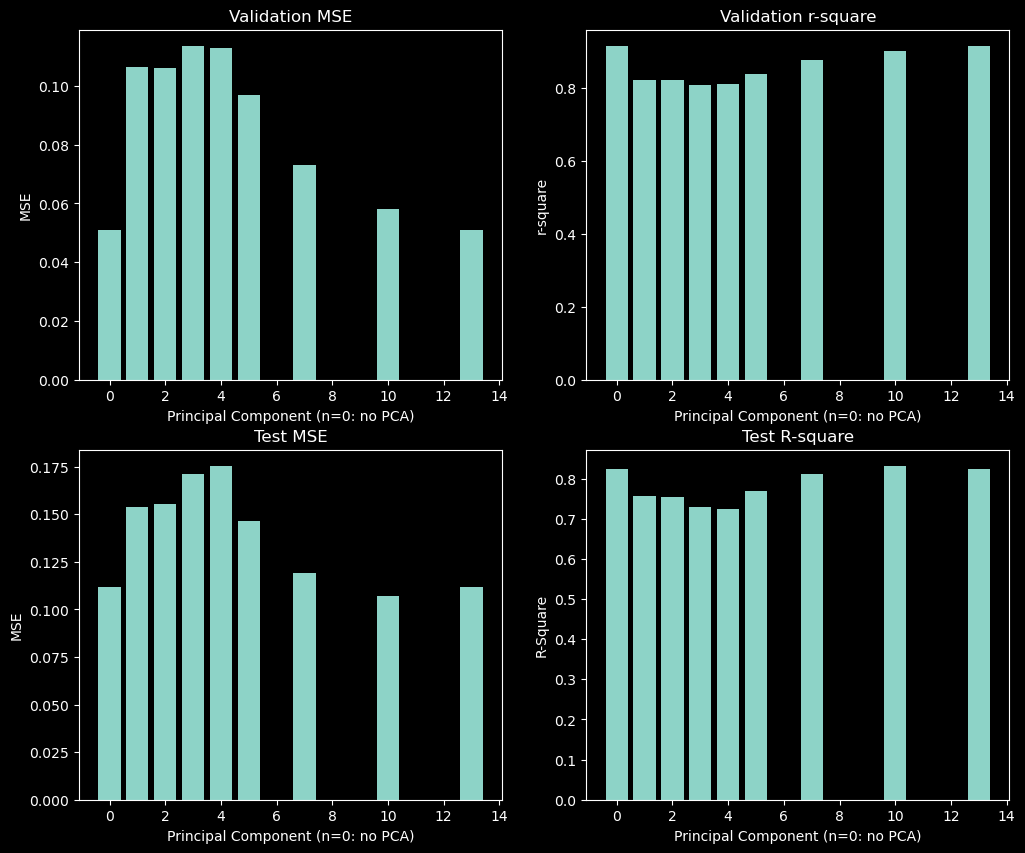

</br>


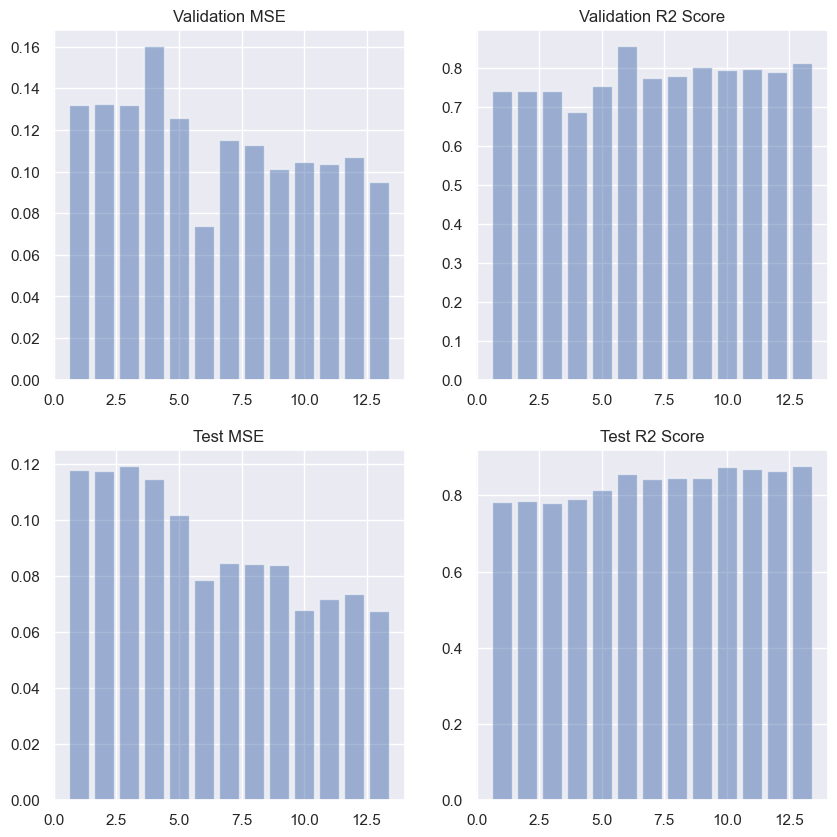

In [19]:
### START CODE HERE ###
plt.figure(figsize=( 10, 10))
plt.subplot(2,2,1), plt.bar(n_list, mselist_val, alpha=0.5, align='center')
plt.title('Validation MSE')
plt.subplot(2,2,2), plt.bar(n_list, r2scorelist_val, alpha=0.5, align='center')
plt.title('Validation R2 Score')
plt.subplot(2,2,3), plt.bar(n_list, mselist_test, alpha=0.5, align='center')
plt.title('Test MSE')
plt.subplot(2,2,4), plt.bar(n_list, r2scorelist_test, alpha=0.5, align='center')
plt.title('Test R2 Score')




...

plt.show()
### END CODE HERE ###

## Question

1. What is the optimal value of n that

- ensures the Mean Squared Error (MSE) difference by no more than 0.01 from the MSE of the original data?

2. When taking into account R-square, what optimum value of n

- results in an R-square difference not exceeding 0.1 from the R-square of the original data?

3. Determine the dimension reduction ratio (m / N), where:

- m is the minimum of the optimum values of n obtained from questions 2 and 3.
- N represents the number of input features (dimension of X).


In [20]:
# Ans